# Vaccination in the UK

Import libraries

In [42]:
# work with dataframes
import pandas as pd
# work with dates
import datetime as dt
# explore datasets
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
# build a model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# split the dataset
from sklearn.model_selection import train_test_split
# evaluate the model
from sklearn.metrics import mean_absolute_error
# graph data
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Step 0: Read the dataset

Read csv-file

In [3]:
path = "/Users/travel_mechtal/Documents/UWE/Portfolio/"
data=pd.read_csv(path + "region_2022-01-27.csv")

Look at the five first rows of the dataset

In [4]:
data.head()

,areaCode,areaName,areaType,date,newPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedThirdInjectionByVaccinationDate
0,E12000009,South West,region,2022-01-26,986,2520,4034.0
1,E12000009,South West,region,2022-01-25,899,1845,4283.0
2,E12000009,South West,region,2022-01-24,723,1445,3441.0
3,E12000009,South West,region,2022-01-23,1035,3007,3439.0
4,E12000009,South West,region,2022-01-22,1822,4709,5896.0


Drop unnecessary columns

In [5]:
dataset = data.drop(["areaCode", "areaName", "areaType"], axis=1)

Rename columns

In [6]:
dataset = dataset.rename(columns={"newPeopleVaccinatedFirstDoseByVaccinationDate":"First", 
                                  "newPeopleVaccinatedSecondDoseByVaccinationDate":"Second", 
                                  "newPeopleVaccinatedThirdInjectionByVaccinationDate":"Third"})

Look at the final version of the dataset

In [7]:
dataset.head()

,date,First,Second,Third
0,2022-01-26,986,2520,4034.0
1,2022-01-25,899,1845,4283.0
2,2022-01-24,723,1445,3441.0
3,2022-01-23,1035,3007,3439.0
4,2022-01-22,1822,4709,5896.0


## Step 1: Work with dates. Engineer Datatime Features

Get the date in python-format

In [8]:
dataset['Date'] = pd.to_datetime(dataset['date'])

In [9]:
dataset['Date'] = dataset['Date'].dt.strftime('%Y-%m-%d')

Get features:
1) Year
2) Month
3) Day
etc.

In [10]:
dataset['Year'] = pd.DatetimeIndex(dataset['Date']).year

In [11]:
dataset['Month'] = pd.DatetimeIndex(dataset['Date']).month

In [12]:
dataset['Day'] = pd.DatetimeIndex(dataset['Date']).day

In [13]:
dataset['DayOfYear'] = pd.DatetimeIndex(dataset['Date']).dayofyear

In [14]:
dataset['WeekOfYear'] = pd.DatetimeIndex(dataset['Date']).weekofyear

/var/folders/gf/5d3ljzjd5tj4xmg688lrs9j40000gn/T/ipykernel_53797/1358769492.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  dataset['WeekOfYear'] = pd.DatetimeIndex(dataset['Date']).weekofyear


In [15]:
dataset['Weekday'] = pd.DatetimeIndex(dataset['Date']).weekday

In [16]:
dataset['Quarter'] = pd.DatetimeIndex(dataset['Date']).quarter

In [17]:
dataset['IsMonthStart'] = pd.DatetimeIndex(dataset['Date']).is_month_start

In [18]:
dataset['IsMonthEnd'] = pd.DatetimeIndex(dataset['Date']).is_month_end

Look at the dataset with new features

In [19]:
dataset.head()

,date,First,Second,Third,Date,Year,Month,Day,DayOfYear,WeekOfYear,Weekday,Quarter,IsMonthStart,IsMonthEnd
0,2022-01-26,986,2520,4034.0,2022-01-26,2022,1,26,26,4,2,1,False,False
1,2022-01-25,899,1845,4283.0,2022-01-25,2022,1,25,25,4,1,1,False,False
2,2022-01-24,723,1445,3441.0,2022-01-24,2022,1,24,24,4,0,1,False,False
3,2022-01-23,1035,3007,3439.0,2022-01-23,2022,1,23,23,3,6,1,False,False
4,2022-01-22,1822,4709,5896.0,2022-01-22,2022,1,22,22,3,5,1,False,False


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          415 non-null    object 
 1   First         415 non-null    int64  
 2   Second        415 non-null    int64  
 3   Third         411 non-null    float64
 4   Date          415 non-null    object 
 5   Year          415 non-null    int64  
 6   Month         415 non-null    int64  
 7   Day           415 non-null    int64  
 8   DayOfYear     415 non-null    int64  
 9   WeekOfYear    415 non-null    int64  
 10  Weekday       415 non-null    int64  
 11  Quarter       415 non-null    int64  
 12  IsMonthStart  415 non-null    bool   
 13  IsMonthEnd    415 non-null    bool   
dtypes: bool(2), float64(1), int64(9), object(2)
memory usage: 39.8+ KB


**What is about Missing values? 
For example, there may be only one dose per day.**

## Step 2: Explore the dataset

In [21]:
profile = ProfileReport(dataset)

In [22]:
profile.to_file("DatasetRegion.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
dataset.groupby("Weekday").First.mean()

Weekday
0     7464.813559
1     9470.350000
2    11904.450000
3    12821.627119
4    13246.372881
5    15635.271186
6     6732.288136
Name: First, dtype: float64

## Step 3: Split sets and Train a Machine Learning Model

Prepare sets

In [24]:
def prepare_sets(dataset, feature_columns, y_column):
    train_X, val_X, train_y, val_y = train_test_split(dataset[feature_columns], dataset[y_column], random_state=1)
    return train_X, val_X, train_y, val_y

Train and evaluate the model

In [25]:
def train_model(train_X, val_X, train_y, val_y, model_type, n_estimators=None):
    if model_type == "DecisionTree":
        model = DecisionTreeRegressor(random_state=1)
    elif model_type == "RandomForest":
        model = RandomForestRegressor(random_state=1, n_estimators=n_estimators)
    model.fit(train_X, train_y)
    predictions = model.predict(val_X)
    mae = mean_absolute_error(predictions, val_y)
    return mae, predictions

## Step 4: Evaluate performance

Define necessary variables

In [99]:
feature_columns = ["Year", "Month", "Day", "Weekday", "IsMonthStart", "IsMonthEnd"]
y_list = ["First", "Second"]
model_list = ["DecisionTree", "RandomForest"]
estimators_list = [100,200,300,400,500]
results = {}
val_sets = {}

Train models using parameters

In [100]:
for y in y_list:
    train_X, val_X, train_y, val_y = prepare_sets(dataset, feature_columns, y)
    val_sets[(y, "val_X")] = val_X
    val_sets[(y, "val_y")] = val_y
    for model in model_list:
        if model != "RandomForest":
            results[(y,model,"mae", 0)], results[(y,model,"predictions", 0)] = train_model(train_X, val_X, train_y, val_y, model, n_estimators=None)
        else:
            for n in estimators_list:
                results[(y,model,"mae", n)], results[(y,model,"predictions", n)] = train_model(train_X, val_X, train_y, val_y, model, n)

Show results

In [101]:
for res in results.keys():
    column, model, measure, treecount = res
    if measure == "mae":
        print(res, "Result: ", 1 - results[res]/dataset[column].mean())

('First', 'DecisionTree', 'mae', 0) Result:  0.6437087212771292
('First', 'RandomForest', 'mae', 100) Result:  0.751618587539483
('First', 'RandomForest', 'mae', 200) Result:  0.75634355378726
('First', 'RandomForest', 'mae', 300) Result:  0.7542008733902813
('First', 'RandomForest', 'mae', 400) Result:  0.7550162219639709
('First', 'RandomForest', 'mae', 500) Result:  0.754843479613817
('Second', 'DecisionTree', 'mae', 0) Result:  0.706121636338128
('Second', 'RandomForest', 'mae', 100) Result:  0.7715985048182643
('Second', 'RandomForest', 'mae', 200) Result:  0.776153470596447
('Second', 'RandomForest', 'mae', 300) Result:  0.7765567227604535
('Second', 'RandomForest', 'mae', 400) Result:  0.7751089448055306
('Second', 'RandomForest', 'mae', 500) Result:  0.7738541991708733


In [102]:
for val in val_sets.keys():
    column, val_set = val
    if val_set == "val_y":
        print(val_sets[val])

388     3067
102     1261
187     2964
162     2420
90      5791
       ...  
164     1443
228    27872
39      2812
261    10707
185     2022
Name: First, Length: 104, dtype: int64
388      582
102     2233
187    13165
162    12100
90      1582
       ...  
164     9930
228    26182
39      3981
261    20341
185     9077
Name: Second, Length: 104, dtype: int64


## Step 5: Plot results

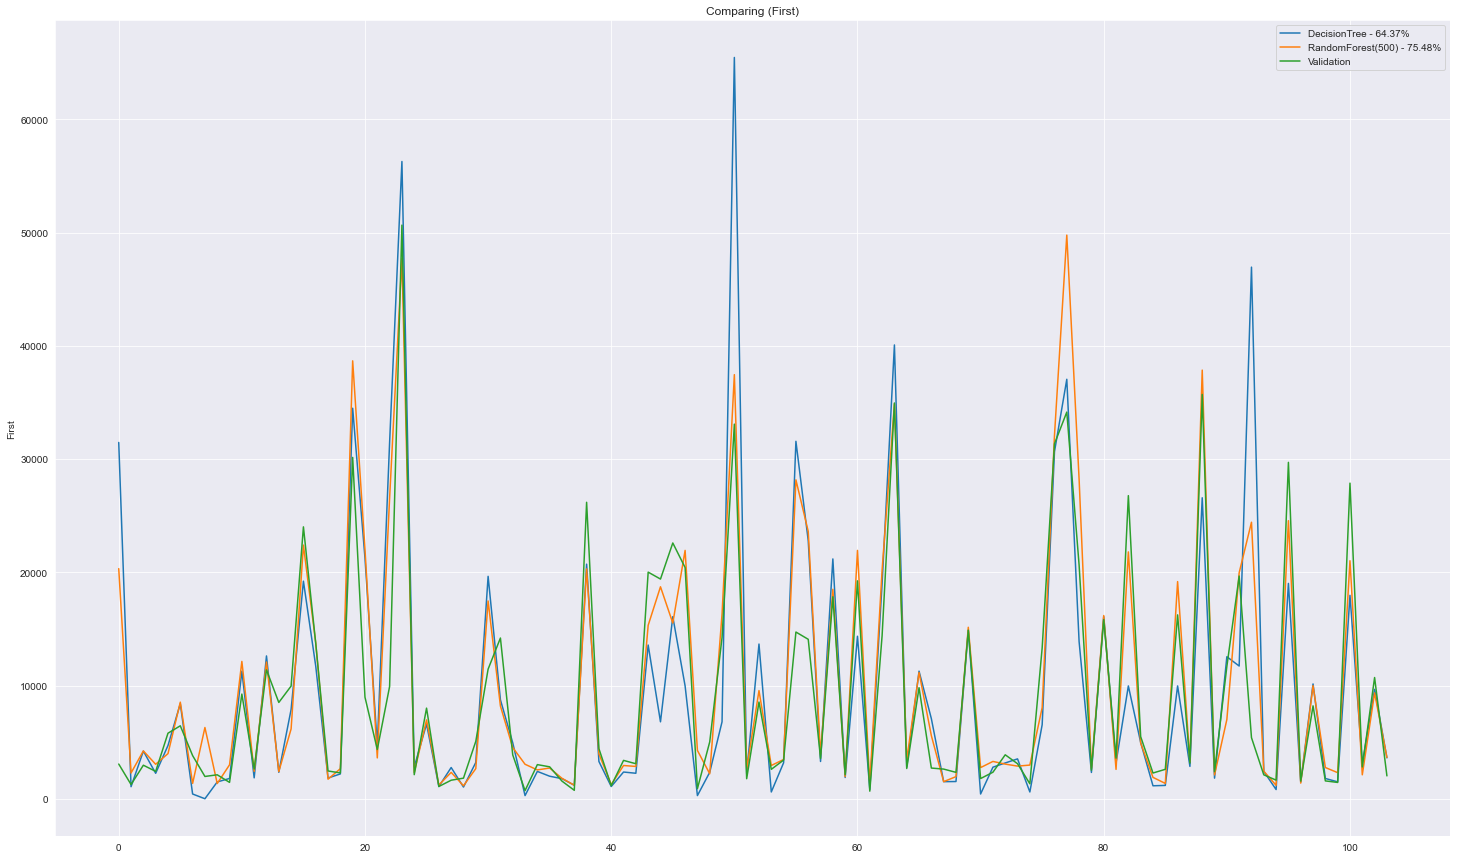

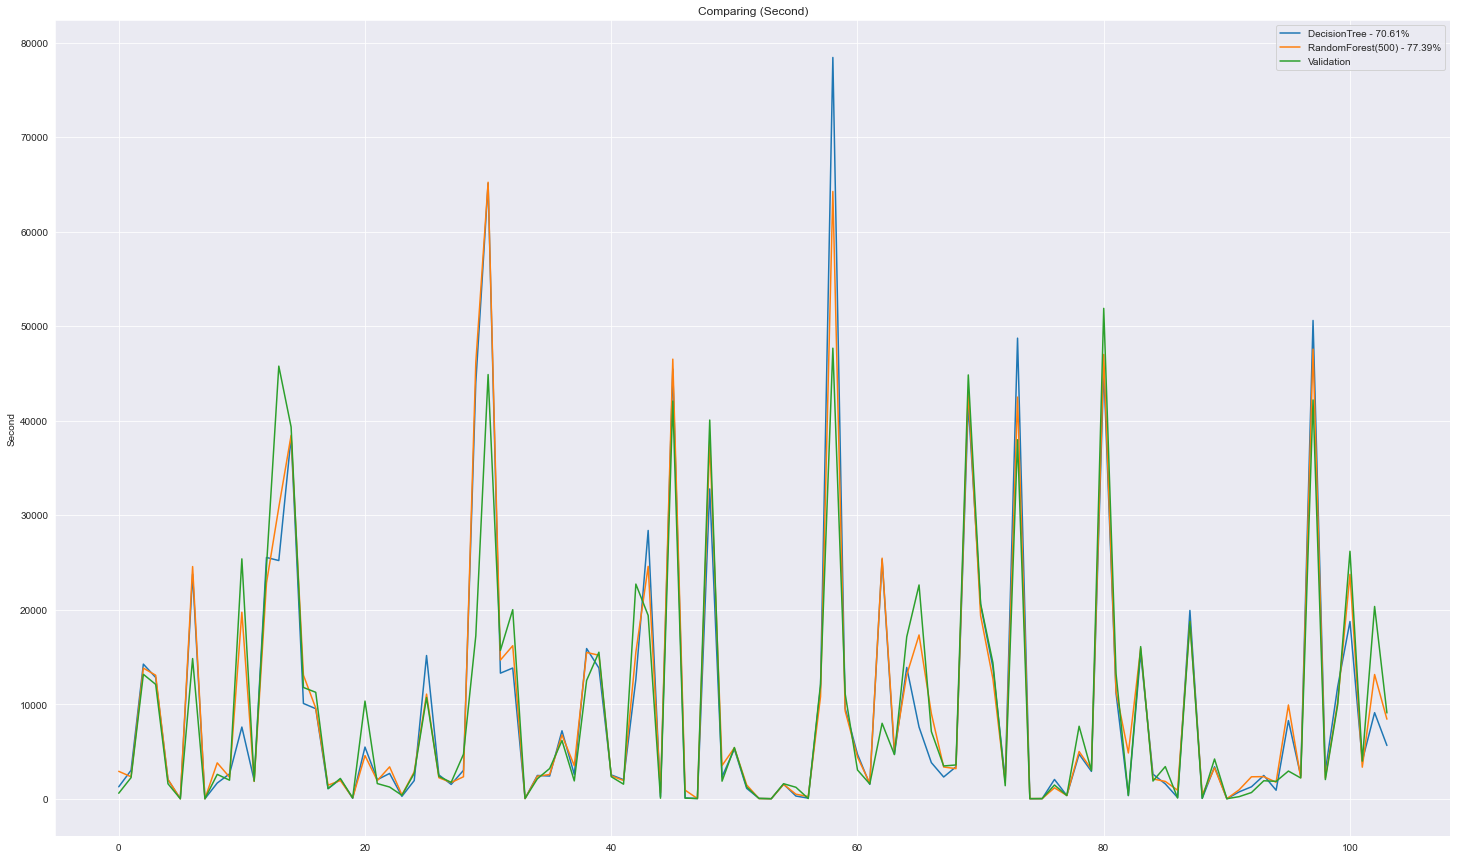

In [117]:
for y in y_list:
    # set size, style and title
    plt.figure(figsize=(25,15))
    sns.set_style("darkgrid")
    plt.title('{} ({})'.format("Comparing", y))
    # plot predictions
    for model in model_list:
        if model == "RandomForest":
            sns.lineplot(data=results[(y, model, "predictions", 500)], label = '{}({}) - {:.2%}'.format(model, 500, 1 - results[(y,model,"mae",500)]/dataset[y].mean()))
        else:
            sns.lineplot(data=results[(y, model, "predictions", 0)], label = '{} - {:.2%}'.format(model, 1 - results[(y,model,"mae",0)]/dataset[y].mean()))
    # plot validation set
    val_sets[(y, "val_y")].index=range(0,len(val_sets[(y, "val_y")]))
    sns.lineplot(data=val_sets[(y, "val_y")], label="Validation")
    # add legend
    plt.legend()